In [1]:
import pandas as pd

In [2]:
df_predi =pd.read_csv('newdata/datasetreco.csv',delimiter=';')

In [3]:
df_predi

,Date,Time,event_type,user_id,user_session,product_id,price,category,subcategory,subsubcategory,is_view,is_cart,is_purchase,p_views,p_carts,p_purchases,user_views,user_carts,user_purchases
0,2020-09-24,12:02:19,view,1515915625519390366,F71OG8wWVP,3828758,21.59,electronics,audio,acoustic,1,0,0,372,1,0,1,0,0
1,2020-09-24,12:22:49,view,1515915625519398031,hq3JGndGca,1271549,405.65,electronics,audio,acoustic,1,0,0,365,1,0,1,0,0
2,2020-09-24,12:48:31,view,1515915625519407618,JB3Sy5LCfb,124712,204.79,electronics,audio,acoustic,1,0,0,513,68,61,2,1,1
3,2020-09-24,12:49:34,view,1515915625519407618,bRZAHDpYFC,124712,204.79,electronics,audio,acoustic,1,0,0,513,68,61,2,1,1
4,2020-09-24,12:50:22,cart,1515915625519407618,bRZAHDpYFC,124712,204.79,electronics,audio,acoustic,0,1,0,513,68,61,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305904,2021-02-28,22:12:03,view,1515915625611012647,i4cphLZzmV,3506321,11.86,computers,peripherals,wifi,1,0,0,151,0,0,1,0,0
305905,2021-02-28,22:51:09,view,1515915625611017316,iiyIldOJxy,3721154,327.43,computers,peripherals,wifi,1,0,0,427,25,18,1,0,0
305906,2021-02-28,23:06:42,view,1515915625611014848,34XnVqZSSp,3698949,31.17,computers,peripherals,wifi,1,0,0,12,1,0,2,0,0
305907,2021-02-28,23:08:23,view,1515915625611014848,34XnVqZSSp,673347,36.37,computers,peripherals,wifi,1,0,0,23,0,0,2,0,0


In [4]:
df_predi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305909 entries, 0 to 305908
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            305909 non-null  object 
 1   Time            305909 non-null  object 
 2   event_type      305909 non-null  object 
 3   user_id         305909 non-null  int64  
 4   user_session    305909 non-null  object 
 5   product_id      305909 non-null  int64  
 6   price           305909 non-null  float64
 7   category        305909 non-null  object 
 8   subcategory     305909 non-null  object 
 9   subsubcategory  305909 non-null  object 
 10  is_view         305909 non-null  int64  
 11  is_cart         305909 non-null  int64  
 12  is_purchase     305909 non-null  int64  
 13  p_views         305909 non-null  int64  
 14  p_carts         305909 non-null  int64  
 15  p_purchases     305909 non-null  int64  
 16  user_views      305909 non-null  int64  
 17  user_carts

In [5]:
df=df_predi


agg_df = df.groupby('product_id').agg(
    p_views_sum=pd.NamedAgg(column='p_views', aggfunc='sum'),
    p_carts_sum=pd.NamedAgg(column='p_carts', aggfunc='sum'),
    p_purchases_sum=pd.NamedAgg(column='p_purchases', aggfunc='sum')
).reset_index()

agg_df['rating'] = agg_df['p_views_sum'] * 2 + agg_df['p_carts_sum'] * 10 + agg_df['p_purchases_sum'] * 8

df = df.merge(agg_df[['product_id', 'rating']], on='product_id', how='left')

print(df.head())


         Date      Time event_type              user_id user_session  \
0  2020-09-24  12:02:19       view  1515915625519390366   F71OG8wWVP   
1  2020-09-24  12:22:49       view  1515915625519398031   hq3JGndGca   
2  2020-09-24  12:48:31       view  1515915625519407618   JB3Sy5LCfb   
3  2020-09-24  12:49:34       view  1515915625519407618   bRZAHDpYFC   
4  2020-09-24  12:50:22       cart  1515915625519407618   bRZAHDpYFC   

   product_id   price     category subcategory subsubcategory  is_view  \
0     3828758   21.59  electronics       audio       acoustic        1   
1     1271549  405.65  electronics       audio       acoustic        1   
2      124712  204.79  electronics       audio       acoustic        1   
3      124712  204.79  electronics       audio       acoustic        1   
4      124712  204.79  electronics       audio       acoustic        0   

   is_cart  is_purchase  p_views  p_carts  p_purchases  user_views  \
0        0            0      372        1           

In [6]:
df

,Date,Time,event_type,user_id,user_session,product_id,price,category,subcategory,subsubcategory,is_view,is_cart,is_purchase,p_views,p_carts,p_purchases,user_views,user_carts,user_purchases,rating
0,2020-09-24,12:02:19,view,1515915625519390366,F71OG8wWVP,3828758,21.59,electronics,audio,acoustic,1,0,0,372,1,0,1,0,0,281242
1,2020-09-24,12:22:49,view,1515915625519398031,hq3JGndGca,1271549,405.65,electronics,audio,acoustic,1,0,0,365,1,0,1,0,0,270840
2,2020-09-24,12:48:31,view,1515915625519407618,JB3Sy5LCfb,124712,204.79,electronics,audio,acoustic,1,0,0,513,68,61,2,1,1,1408548
3,2020-09-24,12:49:34,view,1515915625519407618,bRZAHDpYFC,124712,204.79,electronics,audio,acoustic,1,0,0,513,68,61,2,1,1,1408548
4,2020-09-24,12:50:22,cart,1515915625519407618,bRZAHDpYFC,124712,204.79,electronics,audio,acoustic,0,1,0,513,68,61,2,1,1,1408548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305904,2021-02-28,22:12:03,view,1515915625611012647,i4cphLZzmV,3506321,11.86,computers,peripherals,wifi,1,0,0,151,0,0,1,0,0,45602
305905,2021-02-28,22:51:09,view,1515915625611017316,iiyIldOJxy,3721154,327.43,computers,peripherals,wifi,1,0,0,427,25,18,1,0,0,586560
305906,2021-02-28,23:06:42,view,1515915625611014848,34XnVqZSSp,3698949,31.17,computers,peripherals,wifi,1,0,0,12,1,0,2,0,0,442
305907,2021-02-28,23:08:23,view,1515915625611014848,34XnVqZSSp,673347,36.37,computers,peripherals,wifi,1,0,0,23,0,0,2,0,0,1058


In [7]:
df['rating']

0          281242
1          270840
2         1408548
3         1408548
4         1408548
           ...   
305904      45602
305905     586560
305906        442
305907       1058
305908       1058
Name: rating, Length: 305909, dtype: int64

In [8]:
df_purchased = df[df["is_purchase"]>=1]

In [9]:
df_purchased = df_purchased[['user_id','product_id','category','subcategory','subsubcategory','rating']]

In [10]:
df_purchased

,user_id,product_id,category,subcategory,subsubcategory,rating
5,1515915625519407618,124712,electronics,audio,acoustic,1408548
18,1515915625519470631,857266,electronics,audio,acoustic,1520
39,1515915625519539652,1803560,electronics,audio,acoustic,1620
52,1515915625519581197,124712,electronics,audio,acoustic,1408548
260,1515915625395198150,167423,electronics,audio,acoustic,66340
...,...,...,...,...,...,...
305629,1515915625608513470,673122,computers,peripherals,wifi,45510
305674,1515915625608758157,1803710,computers,peripherals,wifi,23384
305722,1515915625608513470,673122,computers,peripherals,wifi,45510
305752,1515915625609417292,3623542,computers,peripherals,wifi,34662


In [11]:
df_purchased.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15469 entries, 5 to 305761
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         15469 non-null  int64 
 1   product_id      15469 non-null  int64 
 2   category        15469 non-null  object
 3   subcategory     15469 non-null  object
 4   subsubcategory  15469 non-null  object
 5   rating          15469 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 846.0+ KB


In [12]:
df_purchased=df_purchased.drop_duplicates()


In [13]:
df_purchased.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10105 entries, 5 to 305761
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         10105 non-null  int64 
 1   product_id      10105 non-null  int64 
 2   category        10105 non-null  object
 3   subcategory     10105 non-null  object
 4   subsubcategory  10105 non-null  object
 5   rating          10105 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 552.6+ KB


In [14]:
pivot_table = df_purchased.pivot(index='product_id', columns='user_id', values='rating')
pivot_table = pivot_table.fillna(0)

In [15]:
pivot_table

user_id,1515915625353286099,1515915625353457259,1515915625353561691,1515915625353900095,1515915625354176736,1515915625354822642,1515915625354857951,1515915625355179497,1515915625355421833,1515915625355947830,...,1515915625610969297,1515915625610973155,1515915625610976222,1515915625610977027,1515915625610986148,1515915625610986825,1515915625610987171,1515915625610991774,1515915625610997879,1515915625610999486
product_id,,,,,,,,,,,,,,,,,,,,,
2365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7614028.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4183863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4183864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(pivot_table)

normalized_pivot_table = pd.DataFrame(normalized_data, index=pivot_table.index, columns=pivot_table.columns)

print(normalized_pivot_table)

user_id     1515915625353286099  1515915625353457259  1515915625353561691  \
product_id                                                                  
2365                        0.0                  0.0                  0.0   
3727                        0.0                  0.0                  0.0   
4279                        0.0                  0.0                  0.0   
6265                        0.0                  0.0                  0.0   
6476                        0.0                  0.0                  0.0   
...                         ...                  ...                  ...   
4183862                     0.0                  0.0                  0.0   
4183863                     0.0                  0.0                  0.0   
4183864                     0.0                  0.0                  0.0   
4183865                     0.0                  0.0                  0.0   
4183866                     0.0                  0.0                  0.0   

In [32]:
# Ensure the data is normalized before SVD
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(normalized_pivot_table)

svd = TruncatedSVD(n_components=5, random_state=42)
reduced_data = svd.fit_transform(normalized_data)


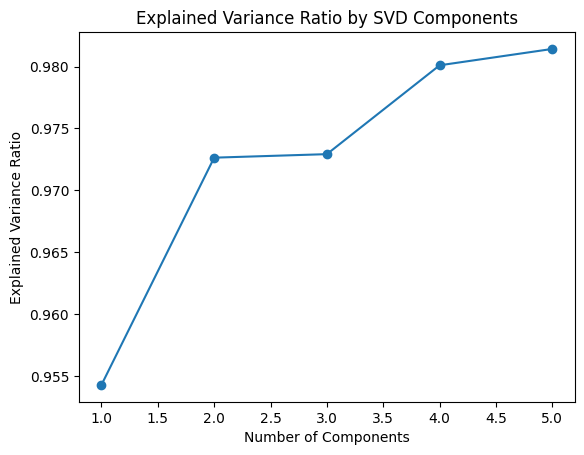

In [34]:
explained_variance_ratio = svd.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1),1- explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by SVD Components')
plt.show()

In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA,TruncatedSVD

pca = PCA().fit(normalized_data)



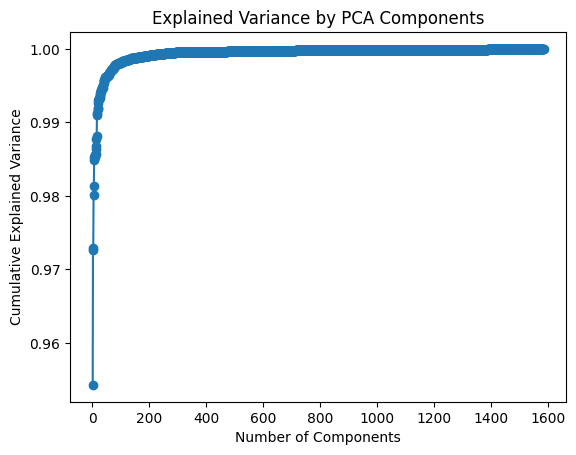

In [37]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),1- pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

In [69]:
from sklearn.decomposition import PCA

df_svd = pd.DataFrame(reduced_data, index=pivot_table.index, columns=[f'SVD{i+1}' for i in range(5)])
print(df_svd)

                SVD1      SVD2      SVD3      SVD4      SVD5
product_id                                                  
2365       -0.526327 -0.515957 -0.221895 -0.348219 -0.296058
3727       -0.524970 -0.513726 -0.220924 -0.346091 -0.294163
4279       -0.604292 -2.174083 -0.703870 -2.165405  8.887061
6265       -0.524970 -0.513726 -0.220924 -0.346091 -0.294163
6476       -0.540301 -0.539359 -0.232078 -0.370974 -0.316671
...              ...       ...       ...       ...       ...
4183862    -0.523627 -0.511526 -0.219968 -0.343995 -0.292309
4183863    -0.596734 -0.248691 -0.329134 -0.880002 -0.375556
4183864    -0.547802 -0.541979 -0.214186 -0.380517 -0.333061
4183865    -0.524970 -0.513726 -0.220924 -0.346091 -0.294163
4183866    -0.525012 -0.513774 -0.220945 -0.343926 -0.294361

[1585 rows x 5 columns]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(normalized_data)

reduced_data = pd.DataFrame(pca_result, index=pivot_table.index, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print(pca_df)

In [46]:
product_correlation_matrix = df_svd.T.corr()


In [47]:
product_correlation_matrix

product_id,2365,3727,4279,6265,6476,7887,11014,11551,16108,16116,...,4183854,4183856,4183859,4183860,4183861,4183862,4183863,4183864,4183865,4183866
product_id,,,,,,,,,,,,,,,,,,,,,
2365,1.000000,0.999993,0.378925,0.999993,0.999189,0.998267,0.999993,0.999445,1.000000,0.999726,...,0.999924,0.955073,0.028085,0.999326,0.998256,0.999973,0.039818,0.993498,0.999993,0.999953
3727,0.999993,1.000000,0.379609,1.000000,0.999033,0.998068,1.000000,0.999315,0.999993,0.999633,...,0.999876,0.955379,0.031329,0.999184,0.998032,0.999993,0.039170,0.993153,1.000000,0.999973
4279,0.378925,0.379609,1.000000,0.379609,0.370123,0.393631,0.379609,0.369675,0.378925,0.374458,...,0.372689,0.634706,0.550969,0.371697,0.370063,0.380243,0.267591,0.312224,0.379609,0.376276
6265,0.999993,1.000000,0.379609,1.000000,0.999033,0.998068,1.000000,0.999315,0.999993,0.999633,...,0.999876,0.955379,0.031329,0.999184,0.998032,0.999993,0.039170,0.993153,1.000000,0.999973
6476,0.999189,0.999033,0.370123,0.999033,1.000000,0.999518,0.999033,0.999972,0.999189,0.999857,...,0.999574,0.950585,-0.007606,0.999993,0.999815,0.998867,0.046986,0.996465,0.999033,0.998852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183862,0.999973,0.999993,0.380243,0.999993,0.998867,0.997859,0.999993,0.999175,0.999973,0.999528,...,0.999815,0.955657,0.034497,0.999031,0.997798,1.000000,0.038519,0.992802,0.999993,0.999979
4183863,0.039818,0.039170,0.267591,0.039170,0.046986,0.059114,0.039170,0.043992,0.039818,0.044158,...,0.039105,0.127486,0.198320,0.046651,0.053501,0.038519,1.000000,0.079251,0.039170,0.032711
4183864,0.993498,0.993153,0.312224,0.993153,0.996465,0.995177,0.993153,0.996125,0.993498,0.995385,...,0.994640,0.927039,-0.064113,0.996225,0.997123,0.992802,0.079251,1.000000,0.993153,0.992810


In [48]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_purchased, test_size=0.2, random_state=42)

pivot_table_train = train_df.pivot(index='product_id', columns='user_id', values='rating').fillna(0)

normalized_data_train = scaler.fit_transform(pivot_table_train)

pca_result_train = pca.fit_transform(normalized_data_train)
pca_df_train = pd.DataFrame(pca_result_train, index=pivot_table_train.index, columns=[f'PC{i+1}' for i in range(pca.n_components_)])


In [49]:
product_correlation_matrix_train = pca_df_train.T.corr()

unique_test_users = test_df['user_id'].unique()

recommendations = {}
for user in unique_test_users:
    user_purchase_history_train = train_df[train_df['user_id'] == user]
    user_purchased_products_train = user_purchase_history_train['product_id'].tolist()
    
    user_recommendations = []
    for product in user_purchased_products_train:
        if product in product_correlation_matrix_train.index:
            product_correlations = product_correlation_matrix_train[product].drop(product)
            top_correlated_products = product_correlations.sort_values(ascending=False).head(5).index.tolist()
            user_recommendations.extend(top_correlated_products)
    
    user_recommendations = list(set(user_recommendations) - set(user_purchased_products_train))
    recommendations[user] = user_recommendations

print(recommendations)


{1515915625543493280: [], 1515915625602928604: [], 1515915625604293348: [1830918, 875399, 1571208, 704649, 4154642, 3699987, 1444883, 1694358, 3829912, 462241, 124712, 1443882, 1342635, 572974, 4279, 122045, 4099648, 1039170, 3829444, 3550413, 1008592, 1613526, 799067, 809948, 1633627, 4155379], 1515915625580903818: [4099648, 4101569, 942339, 809948, 3790736, 3961719, 3829912, 4279, 799067, 136700], 1515915625545780381: [], 1515915625609891667: [], 1515915625531645494: [], 1515915625569649672: [], 1515915625571814980: [], 1515915625571809291: [], 1515915625595919562: [4101569, 3804514, 1008716, 3828462, 4013522], 1515915625580140180: [], 1515915625562248450: [], 1515915625604262310: [], 1515915625597685000: [], 1515915625522878582: [], 1515915625519672140: [], 1515915625539212069: [], 1515915625524577567: [], 1515915625538196071: [], 1515915625591703794: [], 1515915625540769710: [], 1515915625594881245: [], 1515915625596789201: [], 1515915625562112304: [], 1515915625595483116: [], 1515

In [50]:
def precision_recall_at_k(recommendations, test_df, k=800):
    precision_list = []
    recall_list = []
    
    for user, recs in recommendations.items():
        test_user_data = test_df[test_df['user_id'] == user]
        actual_purchases = set(test_user_data['product_id'].tolist())
        
        recommended_k = set(recs[:k])
        relevant_recommended = recommended_k & actual_purchases
        
        precision = len(relevant_recommended) / len(recommended_k) if len(recommended_k) > 0 else 0
        recall = len(relevant_recommended) / len(actual_purchases) if len(actual_purchases) > 0 else 0
        
        precision_list.append(precision)
        recall_list.append(recall)
    
    avg_precision = sum(precision_list) / len(precision_list)
    avg_recall = sum(recall_list) / len(recall_list)
    
    return avg_precision, avg_recall

precision, recall = precision_recall_at_k(recommendations, test_df, k=800)
print(f'Precision at k=800: {precision}')
print(f'Recall at k=800: {recall}')


Precision at k=800: 0.0025467629839183155
Recall at k=800: 0.01689236111111111


In [70]:
import random
random.seed(3)

unique_users = df_purchased['user_id'].unique()

random_user = random.choice(unique_users)

user_purchase_history = df_purchased[df_purchased['user_id'] == random_user]

print("Randomly chosen user's purchase history:")
print(user_purchase_history)

Randomly chosen user's purchase history:
                    user_id  product_id   category  subcategory  \
165131  1515915625537032857     3760003  computers  peripherals   

       subsubcategory  rating  
165131        printer  470288  


In [71]:

for product in user_purchase_history['product_id']:
    if product in product_correlation_matrix.index:
        product_correlations = product_correlation_matrix[product].drop(product)
        top_correlated_products = product_correlations.sort_values(ascending=False).head(5).index.tolist()
        user_recommendations.extend(top_correlated_products)

unique_recommendations = list(set(user_recommendations) - set(user_purchase_history['product_id']))

final_recommendations = []
final_weights = []
for product in unique_recommendations:
    if product in product_correlation_matrix.index:
        total_weight = sum(product_correlation_matrix.loc[product, user_purchase_history['product_id']])
        final_recommendations.append(product)
        final_weights.append(total_weight)

sorted_recommendations = sorted(zip(final_recommendations, final_weights), key=lambda x: x[1], reverse=True)[:5]

recommendations = {
    'products': [x[0] for x in sorted_recommendations],
    'weights': [x[1] for x in sorted_recommendations]
}

# print(f"history of the user {user_purchase_history['product_id']}:")

recommended_df = df_predi[df_predi['product_id'].isin(recommendations['products'])]
recommended_with_categories = recommended_df[['product_id', 'category', 'subcategory', 'subsubcategory']].drop_duplicates()

# print(f"Recommended products for the user {user_purchase_history['product_id']}:")
print(recommended_with_categories)

        product_id   category  subcategory subsubcategory
25021       620291  computers  peripherals         camera
129040     4101476       auto  accessories         player
146540      609196  computers   components   power_supply
298985     1154498  computers  peripherals           wifi
298986     1507368  computers  peripherals           wifi


In [ ]:

for product in user_purchase_history['product_id']:
    if product in product_correlation_matrix.index:
        product_correlations = product_correlation_matrix[product].drop(product)
        top_correlated_products = product_correlations.sort_values(ascending=False).head(5).index.tolist()
        user_recommendations.extend(top_correlated_products)

unique_recommendations = list(set(user_recommendations) - set(user_purchase_history['product_id']))

final_recommendations = []
final_weights = []
for product in unique_recommendations:
    if product in product_correlation_matrix.index:
        total_weight = sum(product_correlation_matrix.loc[product, user_purchase_history['product_id']])
        final_recommendations.append(product)
        final_weights.append(total_weight)

sorted_recommendations = sorted(zip(final_recommendations, final_weights), key=lambda x: x[1], reverse=True)[:5]

recommendations = {
    'products': [x[0] for x in sorted_recommendations],
    'weights': [x[1] for x in sorted_recommendations]
}

# print(f"history of the user {user_purchase_history['product_id']}:")

recommended_df = df_predi[df_predi['product_id'].isin(recommendations['products'])]
recommended_with_categories = recommended_df[['product_id', 'category', 'subcategory', 'subsubcategory']].drop_duplicates()

# print(f"Recommended products for the user {user_purchase_history['product_id']}:")
print(recommended_with_categories)

In [53]:
recommendations

{'products': [4183854,
  4079568,
  4101570,
  482057,
  4079573,
  3957134,
  1821824,
  4079113,
  84029,
  371764,
  4099840,
  3790344,
  564621,
  4154736,
  4171147,
  4099849,
  3623542,
  4170512,
  4078551,
  209957,
  1569747,
  4067425,
  571855,
  3557532,
  838196,
  611554,
  4078417,
  3791046,
  1723799,
  16340,
  1703943,
  4154735,
  1643836,
  59240,
  89666,
  87418,
  4176355,
  1682757,
  847425,
  499349,
  1007253,
  3829003,
  3828706,
  620292,
  1803710,
  1283762,
  3760253,
  1271552,
  788438,
  906439,
  387956,
  4078914,
  16133,
  1821815,
  1399780,
  84028,
  4154619,
  775675,
  1250463,
  3627714,
  3828883,
  1466835,
  652306,
  788861,
  252618,
  3983657,
  3829066,
  1135434,
  1976000,
  1040169,
  3978919,
  4079104,
  821920,
  1452884,
  1804326,
  1282166,
  673122,
  1317440,
  3671615,
  3962688,
  3506278,
  1443939,
  3656520,
  3790940,
  1785571,
  1452877,
  1382188,
  4170539,
  278560,
  427706,
  4154733,
  1795247,
  3828749,


In [54]:
user_recommendations

[2365,
 3727,
 4279,
 6265,
 6476,
 7887,
 11014,
 11551,
 16108,
 16116,
 16117,
 16118,
 16122,
 16133,
 16187,
 16236,
 16237,
 16339,
 16340,
 16440,
 16822,
 16824,
 52039,
 52708,
 52755,
 58307,
 58614,
 59240,
 72632,
 72922,
 73593,
 73605,
 77106,
 78802,
 78811,
 84028,
 84029,
 84499,
 84836,
 84838,
 85962,
 86232,
 86629,
 86993,
 87414,
 87418,
 87492,
 87917,
 88111,
 88687,
 88780,
 89536,
 89666,
 90504,
 91341,
 91588,
 120550,
 120880,
 122045,
 122126,
 123287,
 123668,
 123795,
 124056,
 124080,
 124182,
 124712,
 124797,
 124870,
 125220,
 125295,
 125338,
 125352,
 130522,
 130540,
 130544,
 130780,
 130781,
 136700,
 137302,
 139017,
 139144,
 139173,
 139177,
 139179,
 139282,
 139335,
 139413,
 160013,
 167240,
 167421,
 167423,
 167424,
 167425,
 168793,
 172759,
 173065,
 174904,
 178829,
 180228,
 180990,
 183533,
 206952,
 209957,
 214864,
 225873,
 225879,
 228147,
 228372,
 229412,
 232282,
 234754,
 236551,
 237215,
 248096,
 252618,
 257504,
 257768,


In [56]:
recommendations


{'products': [4183854,
  4079568,
  4101570,
  482057,
  4079573,
  3957134,
  1821824,
  4079113,
  84029,
  371764,
  4099840,
  3790344,
  564621,
  4154736,
  4171147,
  4099849,
  3623542,
  4170512,
  4078551,
  209957,
  1569747,
  4067425,
  571855,
  3557532,
  838196,
  611554,
  4078417,
  3791046,
  1723799,
  16340,
  1703943,
  4154735,
  1643836,
  59240,
  89666,
  87418,
  4176355,
  1682757,
  847425,
  499349,
  1007253,
  3829003,
  3828706,
  620292,
  1803710,
  1283762,
  3760253,
  1271552,
  788438,
  906439,
  387956,
  4078914,
  16133,
  1821815,
  1399780,
  84028,
  4154619,
  775675,
  1250463,
  3627714,
  3828883,
  1466835,
  652306,
  788861,
  252618,
  3983657,
  3829066,
  1135434,
  1976000,
  1040169,
  3978919,
  4079104,
  821920,
  1452884,
  1804326,
  1282166,
  673122,
  1317440,
  3671615,
  3962688,
  3506278,
  1443939,
  3656520,
  3790940,
  1785571,
  1452877,
  1382188,
  4170539,
  278560,
  427706,
  4154733,
  1795247,
  3828749,


In [ ]:
# recommended_products = []
# for product in user_purchase_history['product_id']:
#     print(f"Evaluating product {product}")
#     if product in product_correlation_matrix.index:
#         product_correlations = product_correlation_matrix[product].drop(product)
#         print(f"Product correlations:\n{product_correlations}")
#         top_correlated_products = product_correlations.sort_values(ascending=False).head(5).index.tolist()
#         print(f"Top correlated products: {top_correlated_products}")
#         recommended_products.extend(top_correlated_products)

# recommended_products = list(set(recommended_products) - set(user_purchase_history['product_id']))

# print(f"Recommended products for the user {random_user}: {recommended_products[:5]}")


In [59]:
recommended_df = df_predi[df_predi['product_id'].isin(recommendations['products'])]
recommended_with_categories = recommended_df[['product_id', 'category', 'subcategory', 'subsubcategory']].drop_duplicates()

print(f"Recommended products for the user {random_user}:")
print(recommended_with_categories)


Recommended products for the user 1515915625523474560:
        product_id     category  subcategory subsubcategory
2           124712  electronics        audio       acoustic
9          4100847  electronics        audio       acoustic
10         1674137  electronics        audio       acoustic
11         1166287  electronics        audio       acoustic
15          857266  electronics        audio       acoustic
...            ...          ...          ...            ...
301842      413767    computers  peripherals           wifi
301964      826905    computers  peripherals           wifi
303227     1703845    computers  peripherals           wifi
303299     1283179    computers  peripherals           wifi
304376      678639    computers  peripherals           wifi

[1584 rows x 4 columns]
